<a href="https://colab.research.google.com/github/jahjinx/public_notebooks/blob/main/intro_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression
This notebook follows David Longstreet's series on regression and represents his mathematical presentation in python. Embedded images below are captured from David's videos.
 
[View David's Regression Playlist](https://www.youtube.com/playlist?list=PLF596A4043DBEAE9C)


 ## Goals with Respect to Section
Shortcut definitions of the goals addressed in this notebook.
<br />
 
### Linear Regression
Linear regression allows us to plot a regression line that fits, as closely as possible, any number of points on a plot. By doing so, we can estimate new values as closely as possible by plotting them along the regression line.
 
For example, if x, our independent variable, is "Hours Studied", what might y, our dependent variable, be given 6.5 hours of study time, according to trends in historical data. Conversely, how long might we need to study to achieve a 3.8 gpa?
 
<br />
 
### [Step 1: Find Regression Line's Slope and y-Intercept](https://colab.research.google.com/drive/1O_3mKaGVtBig0DRxPAj3ASCU4WBinY8t#scrollTo=F6QUgkSBEZT7)
Step 1 is to solve $\hat{y} = b_0+b_1x$ given the existing/actual points/observations.
 
The equation above will give us our slope ($b_1$), y-intercept ($b_0$), and one estimated y-value ($\hat{y}$). ($\hat{y}$) is equal to the mean of all actual y-values as the regression line always passes through the means of the actual x and y values.
 
<br />
 
### [Step 2: Find Additional Points Along Regression Line](https://colab.research.google.com/drive/1O_3mKaGVtBig0DRxPAj3ASCU4WBinY8t#scrollTo=4j0hj47Lit34&line=4&uniqifier=1)
Once we find the slope and y-intercept, we can plug in new values for x, our independent variable, to find new estimated y-values ($\hat{y}$) along our regression line.
 
For the sake of future calculations, we will just take x values from our actual/existing observations.
 
<br />
 
### [Step 3: Measure Fit](https://colab.research.google.com/drive/1O_3mKaGVtBig0DRxPAj3ASCU4WBinY8t#scrollTo=ddYVEKNo7K59&line=2&uniqifier=1)
#### $R^2$ Method
We can use $R^2$ to measure how closely our regression line fits the actual data. $R^2$ is a measurement on a scale of 0-1. The closer to 1, the better the fit, with 1 indiciating it perfectly fits the actual data.
 
#### Standard Error of the Estimate (Mean Square Error) Method
The mean squared error tells you how close a regression line is to a set of points. It does this by taking the distances from the points to the regression line (these distances are the “errors”) and squaring them. The squaring is necessary to remove any negative signs. It also gives more weight to larger differences. It’s called the mean squared error as you’re finding the average of a set of errors.
 
The smaller the means squared error, the closer you are to finding the line of best fit. Depending on your data, it may be impossible to get a very small value for the mean squared error.

## Imports

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## The Goal of Linear Regression
The goal of Linear Regression is to fit a line as closely as possible to a number of observations/points on a plot. The line is called a **Regression Line** and is based upon the least squares method.

**Note: The Least Squares Method is useful for finding the regression line in a dataset with a relatively small number of variables and features, but for larger datasets with more observations and more features, Gradient Descent is more efficient*
 
A properly fit regression line will have the lowest possible error from actual value/point to estimated value/point (the nearest observation along the regression line).

## The X & Y axis
The X-axis represents the **independent variable** and the Y-axis represents the **dependent variable**. As a point moves along X, how does Y move?
 
If Y increases as X increases, that is called a **positive relationship**. Positive Relationships result in an upward sloping line on a plot.
 
If Y decreases as X increases, that is called a **negative relationship**. Negative Relationships result in a downward sloping line.

## Example
To illustrate, imagine a plot of Grades (GPA) against Study Time. As study time increases, we expect grades to increase as well. This is a positive relationship. If "Study Time" were, instead, "Time on Facebook", we would expect a downward sloping line as we spend more time on Facebook, our gpa would likely fall. This is a negative relationship.
 
We want to estimate our GPA at, for example 6.3 hours of study time. We can do so by plotting a regression line that, as closely as possible, aligns with historical data of Grades (GPA) against Study Time.

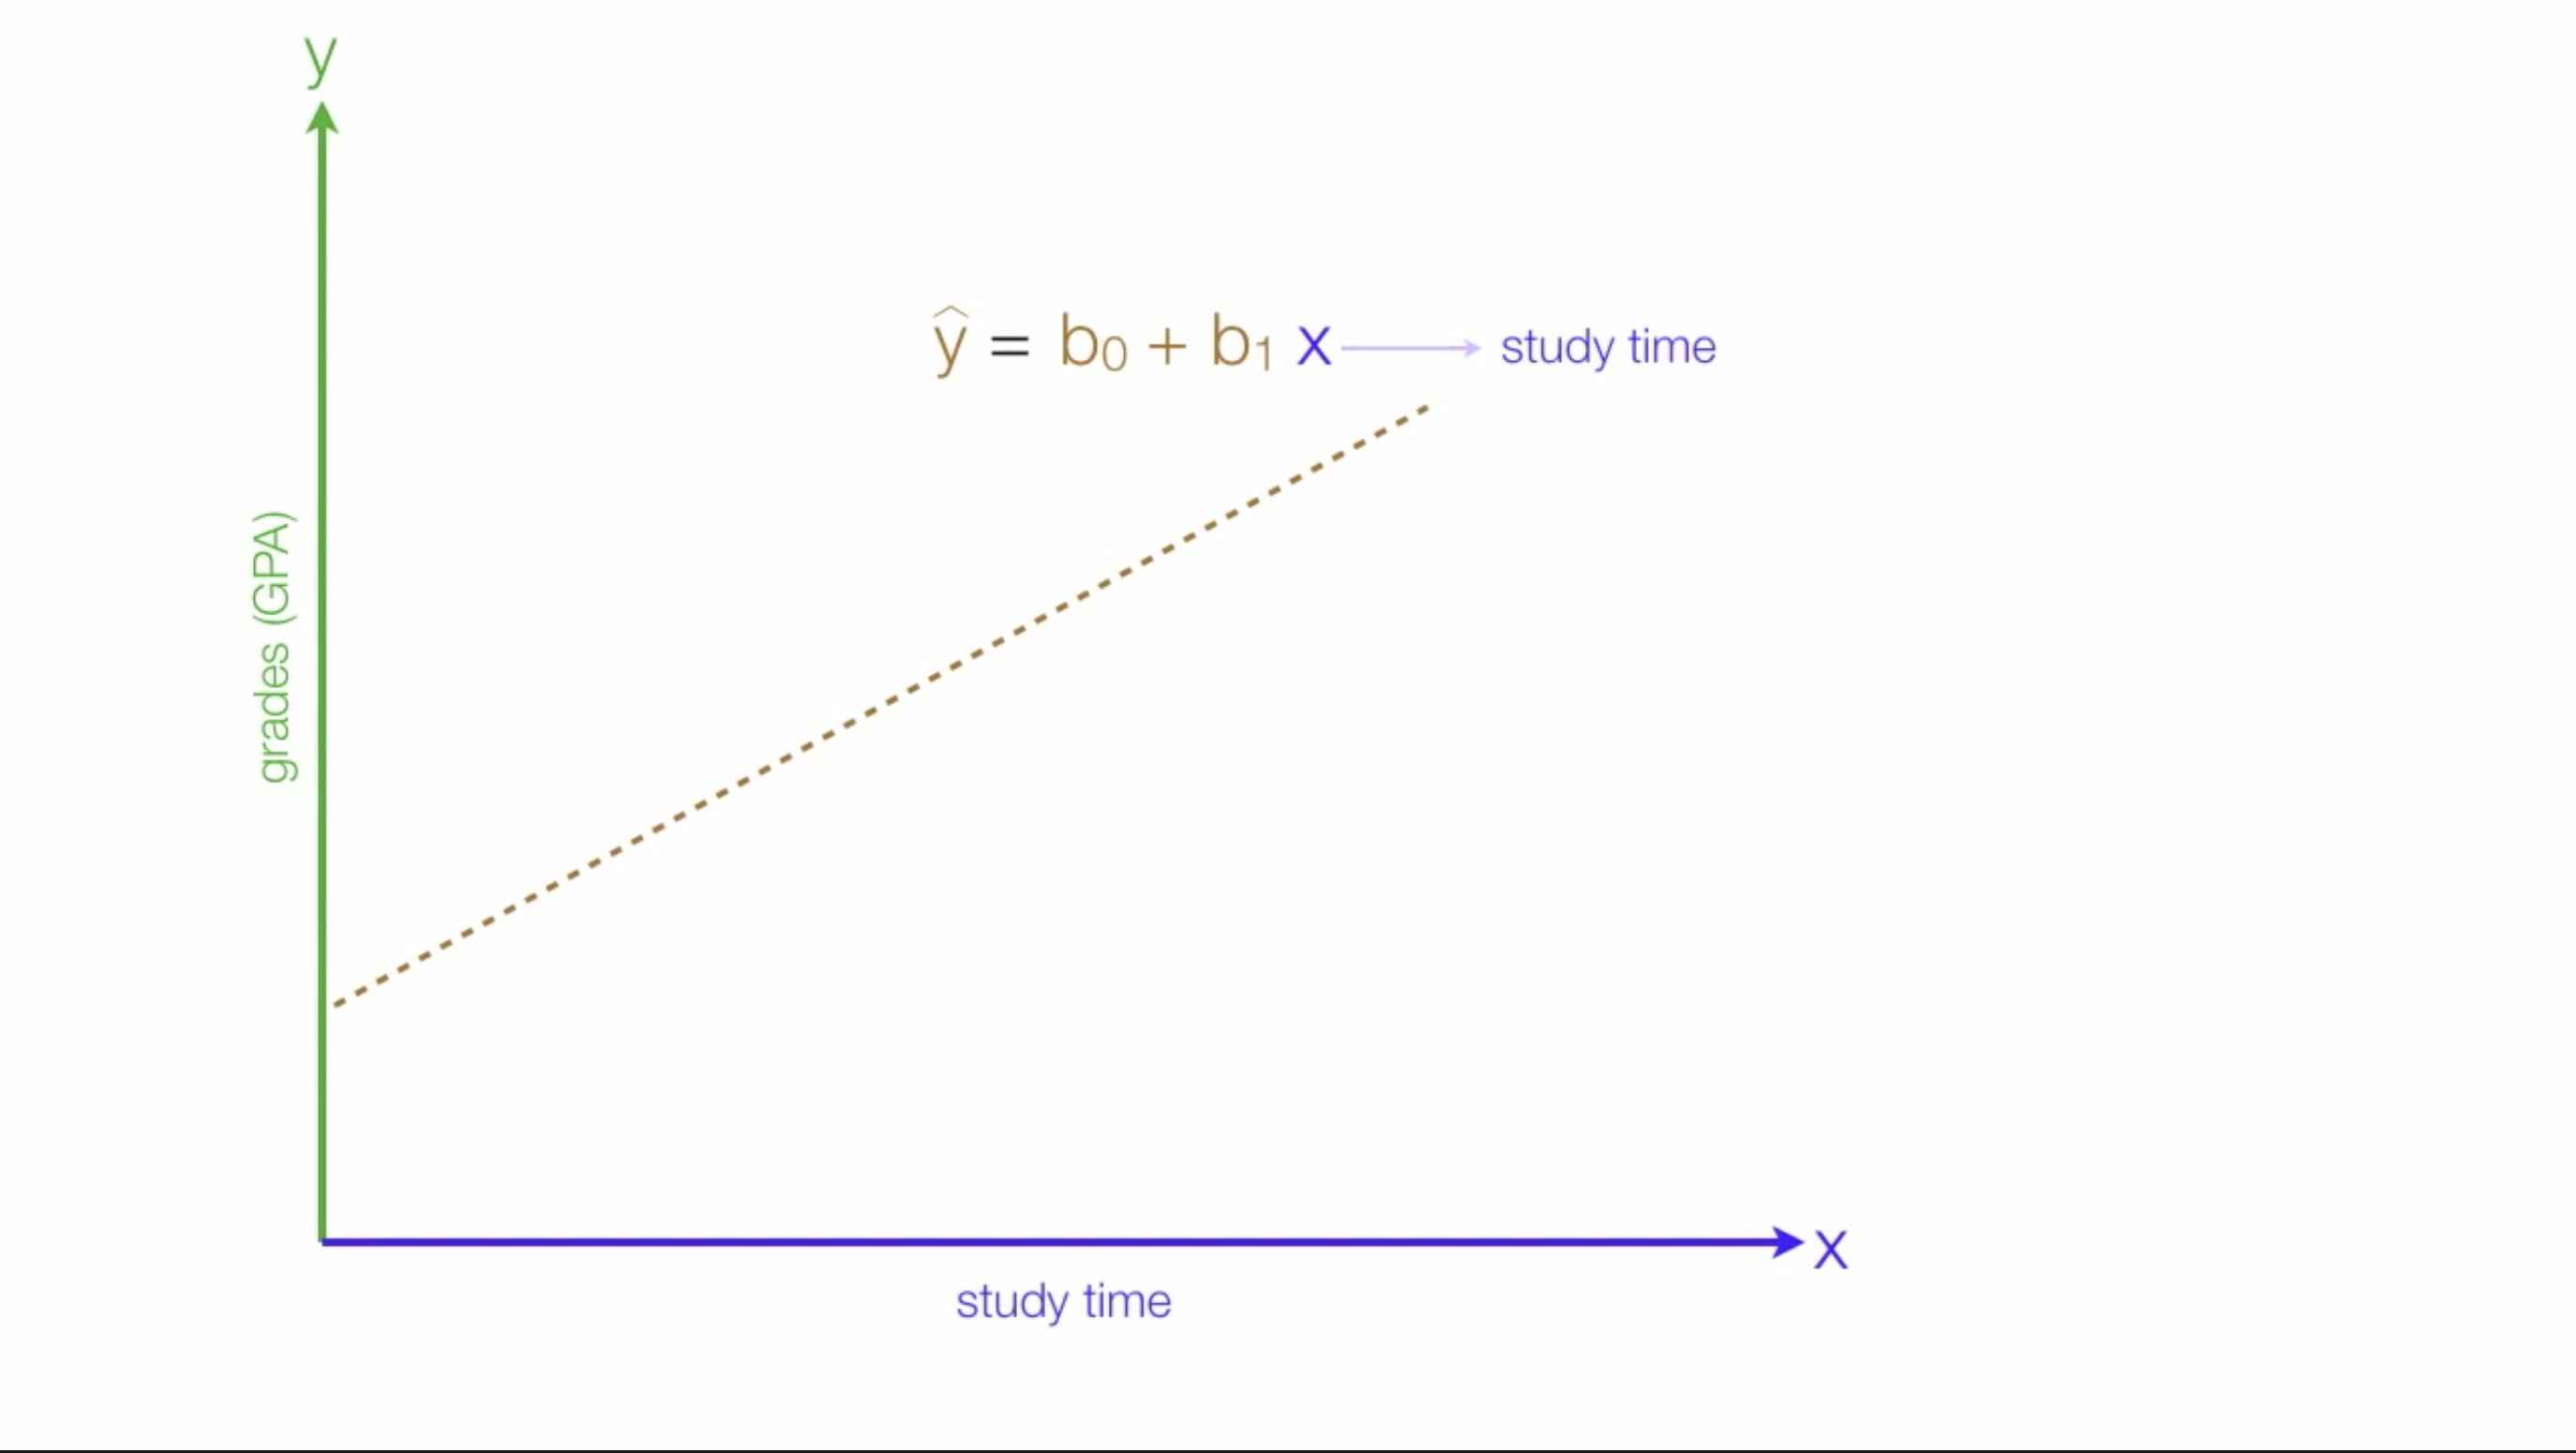

## Sample Data
For this example, we'll designate our observations for our (x, y) values as follows:

In [ ]:
x = [1, 2, 3, 4, 5]
y = [2, 4, 5, 4, 5]

We will add our values to a table as we go, for easier visualization of the data.

In [ ]:
df = pd.DataFrame.from_dict({"x":x, "y":y})
df

,x,y
0,1,2
1,2,4
2,3,5
3,4,4
4,5,5


Our example observations, plotted:

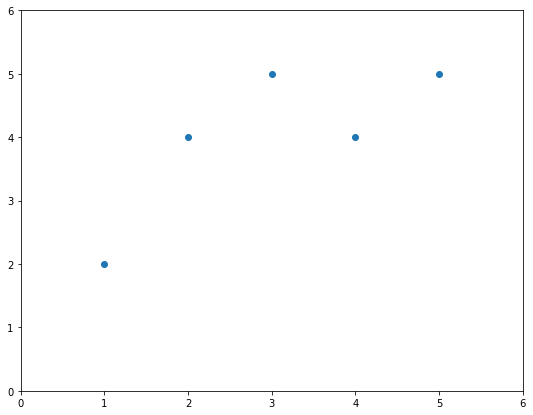

In [ ]:
fig, ax = plt.subplots(figsize=(9,7))
plt.plot(x, y, marker='o', linestyle='none')
ax.set_xticks(range(7))
ax.set_yticks(range(7))
ax.set_xticklabels(range(7))
ax.set_yticklabels(range(7))
plt.show()

## Step 1: Find Regression Line's Slope and y-Intercept
### Our Equation
$$\hat{y} = b_0+b_1x$$

**y-hat** is our estimated grades. $\hat{y}$ is the symbol that represents the predicted equation for a line of best fit in linear regression.

**b-0** is the y-intercept (where the line intersects with the y-axis)

**b_1** is the slope of the line

**x** is the x value

*If we change the x-axis to "time on Facebook," that create a negative relationship, our line would slope downwards, and our equation would change as follows:*
$$\hat{y} = b_0-b_1x$$


### Finding $\hat{y}$
As it turns out, all regression lines must go through the intersection of the means of our x values and our y values. So, we calculate the mean of our x values, then the mean of our y values.


In [ ]:
x_mean = np.mean(x, dtype=np.int)
y_mean = np.mean(y, dtype=np.int)

display(f"x Mean: {x_mean}")
display(f"y Mean: {y_mean}")

'x Mean: 3'

'y Mean: 4'

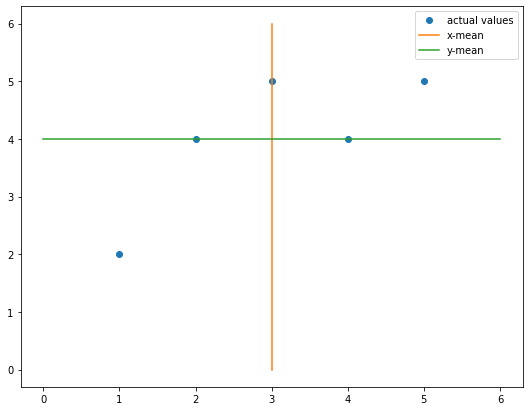

In [ ]:
fig, ax = plt.subplots(figsize=(9,7))
plt.plot(x, y, marker='o', linestyle='none')
plt.plot([3,3], [0, 6]) # a line representing our x mean
plt.plot([0, 6], [4, 4]) # a line representing our y mean
ax.set_xticks(range(7))
ax.set_yticks(range(7))
ax.set_xticklabels(range(7))
ax.set_yticklabels(range(7))
plt.legend(['actual values', 'x-mean', 'y-mean'])
plt.show()

We know that our regression line must go through point (3, 4), the x and y means. In other words, that is where the mean of the dependent variable and the mean of the independent variable cross.
 
This observation is our first "estimated" value along our regression line. We can use them in our equation to help solve for the existing values. We take the y value from (3, 4), 4, as our $\hat{y}$

Put another way, we know that the regression line will always pass through the mean of our y values plotted against the mean of our x values. So, we know one point on our regression line, so we know one of our $\hat{y}$ values-- the mean of all y values.
$$\hat{y} = \frac{\sum{y_i}}{n}$$

### Finding Slope ($b_1$)
First, we will find the slope of our regression line. Slope, here, is represnted by $b_1$:
$$b_1 = \frac{\sum{(x-\bar{x})(y-\bar{y})}}{\sum{(x-\bar{x})^2}}$$

We will begin by finding the distance $(x-\bar{x})$ of the x value to the mean of every observation and also the distance each observation is from the y-mean $(y-\bar{y})$:

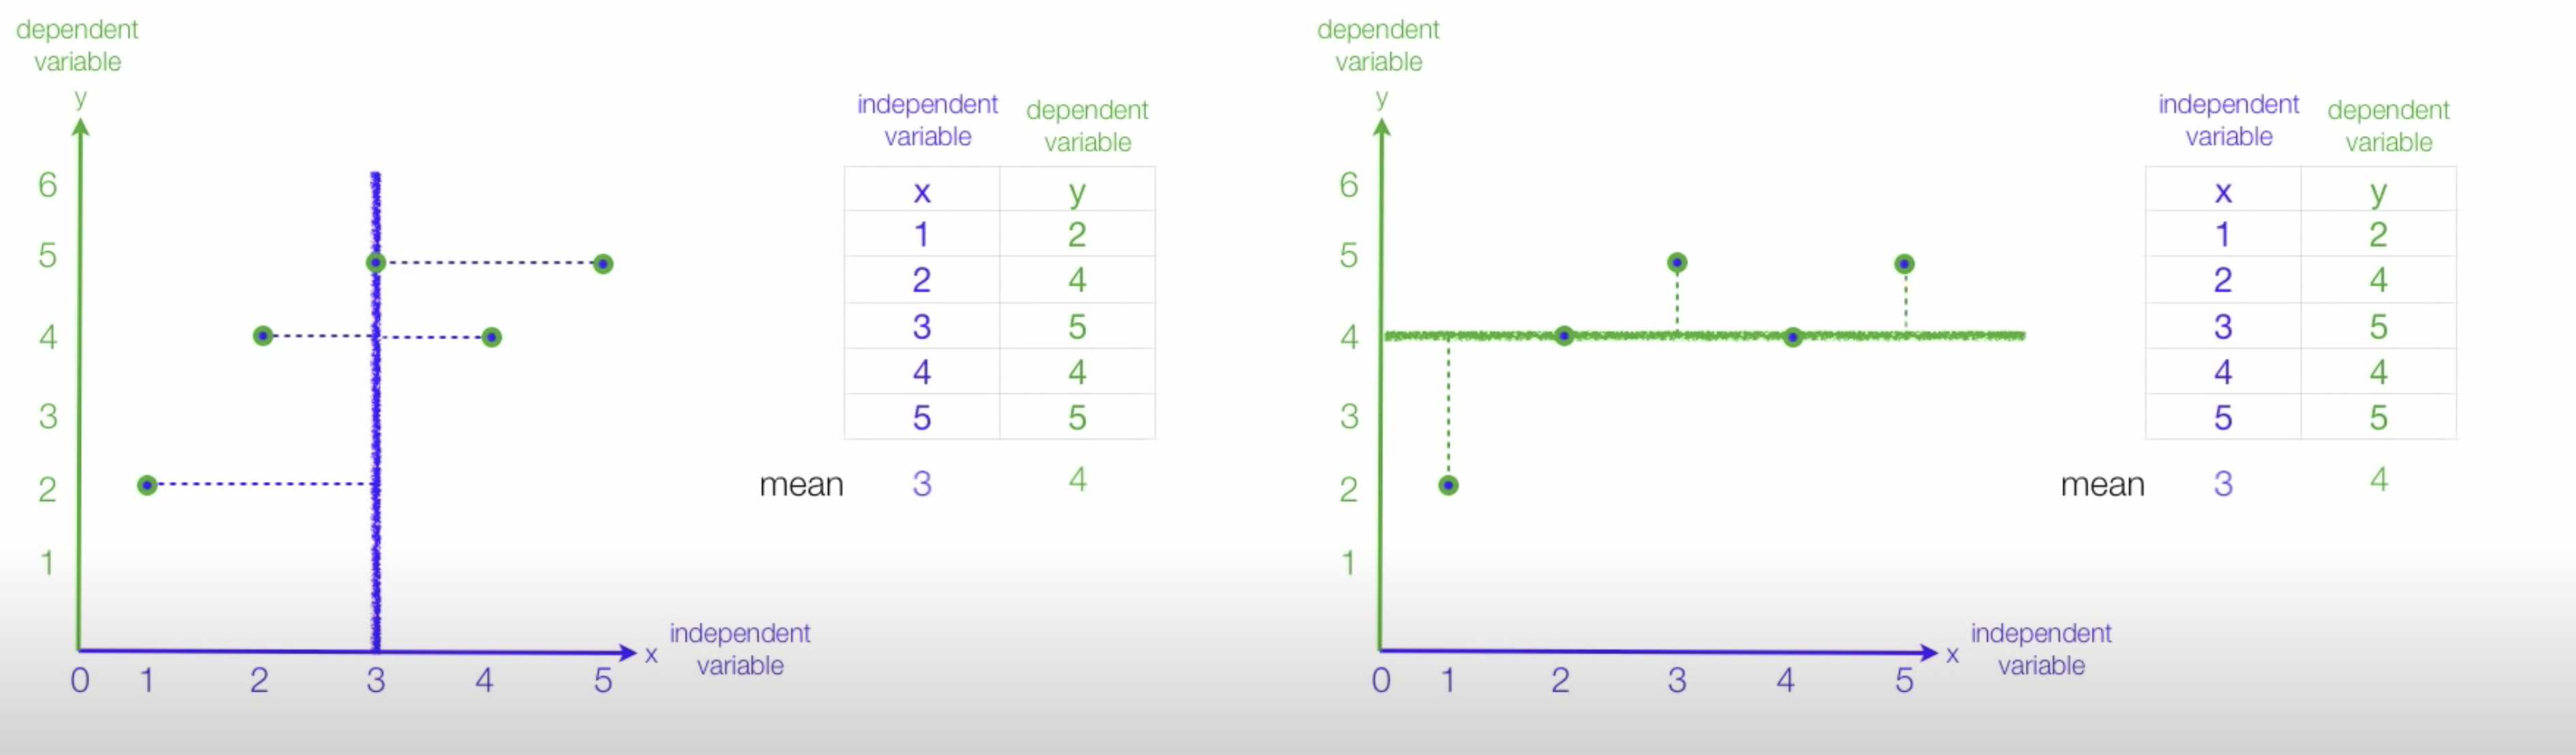

Mathematically, distance can be found by subtracting each value from their mean:
$x-\bar{x}$
and 
$y-\bar{y}$

In [ ]:
x_distance = [value-x_mean for value in x]
y_distance = [value-y_mean for value in y]

display(f"x Distance: {x_distance}")
display(f"y Distance: {y_distance}")

'x Distance: [-2, -1, 0, 1, 2]'

'y Distance: [-2, 0, 1, 0, 1]'

In [ ]:
df['x_distance (x - x̄)'] = x_distance
df['y_distance (y - ȳ)'] = y_distance
df

,x,y,x_distance (x - x̄),y_distance (y - ȳ)
0,1,2,-2,-2
1,2,4,-1,0
2,3,5,0,1
3,4,4,1,0
4,5,5,2,1


Next, we wil square all of our x Distances, $(x-\bar{x})^2$

In [ ]:
x_distance_squared = [value**2 for value in x_distance]
x_distance_squared

[4, 1, 0, 1, 4]

We will also multiply our x_distance values with our y_distance values, $(x-\bar{x})(y-\bar{y})$

In [ ]:
distances_multiplied = [x_distance[i]*y_distance[i] for i in range(len(x_distance))]

distances_multiplied

[4, 0, 0, 0, 2]

Finally, we find $b_1$ by dividing the sum of our distances_multiplied by the sum of our x_distance_squared:

In [ ]:
b_1 = np.sum(distances_multiplied)/np.sum(x_distance_squared)

b_1

0.6

Finding the slope of our equation as a function pythoniclly:
$$b_1 = \frac{\sum{(x-\bar{x})(y-\bar{y})}}{\sum{(x-\bar{x})^2}}$$

In [ ]:
# The following code is intended to work independently, so x and y are redeclared
def find_b_1(x_values, y_values):
  x_mean = np.mean(x, dtype=np.int)
  y_mean = np.mean(y, dtype=np.int) 
  x_distance = [v-x_mean for v in x]
  y_distance = [v-y_mean for v in y]
  x_distance_squared = [value**2 for value in x_distance]
  distances_multiplied = [x_distance[i]*y_distance[i] for i in range(len(x_distance))]

  b_1 = np.sum(distances_multiplied)/np.sum(x_distance_squared)

  return b_1

x = [1, 2, 3, 4, 5]
y = [2, 4, 5, 4, 5]

find_b_1(x, y)

0.6

We find that with our current dataset, $b_1 = 0.6$

### Finding the y-intercept ($b_0$)
Now that we know $\hat{y}$, $b_1$ and $x$ (mean of x values) we can solve the equation to find $b_0$

$\hat{y} = 4$

$b_1 = .6$ 

$x = 3$

**Solve for $b_0$:**

$\hat{y} = b_0+b_1x$

⬇️

$4 = b_0+.6(3)$

⬇️

$4 = b_0 + 1.8$

⬇️

$4-1.8 = b_0 + (1.8 -1.8)$

⬇️

$2.2 = b_0$

### One Function to Find it All
Bringing all of this together, we can define a function that, given a list of x-values and a list of y-values can solve for each part of the equation.
$$\hat{y} = b_0+b_1x$$

In [ ]:
# The following code is intended to work independently, so x and y are redeclared

# find_regression takes the x and y values of our observations and returns:
# y-mean, regression line y-intercept, regresssion line slope, x-mean
def find_regression(x_values, y_values):
  x_mean = np.mean(x, dtype=np.int)
  y_mean = np.mean(y, dtype=np.int)
  x_distance = [v-x_mean for v in x]
  y_distance = [v-y_mean for v in y]
  x_distance_squared = [value**2 for value in x_distance]
  distances_multiplied = [x_distance[i]*y_distance[i] for i in range(len(x_distance))]

  b_1 = np.sum(distances_multiplied)/np.sum(x_distance_squared)
  b_0 = y_mean - (b_1*x_mean)

  return y_mean, b_0, b_1, x_mean

x = [1, 2, 3, 4, 5]
y = [2, 4, 5, 4, 5]

display(f'y_hat: {find_regression(x, y)[0]}')
display(f'b_0/y-intercept: {find_regression(x, y)[1]}')
display(f'b_1/slope: {find_regression(x, y)[2]}')
display(f'x/x_mean: {find_regression(x, y)[3]}')

'y_hat: 4'

'b_0/y-intercept: 2.2'

'b_1/slope: 0.6'

'x/x_mean: 3'

## Step 2: Find Additional Points Along Regression Line
To find additional points along our regression line, we simply plug in new or existing x-values into our equation, using our previously calculated slope and y-intercept. $\hat{y}$ for each equation will be the y-values of our regression line, paired with the respective x-values used to solve for $\hat{y}$.
 
As we will calculate $R^2$ in step 3, we will calculate the points on our regression line that are closest to our actual/observed points. This is done by using the x values of our actual/observed points.

In [ ]:
# The following code is intended to work independently, so x and y are redeclared

# generate_regression_points takes in actual x and y values, passes them through
# the above find_regression function and returns the x and y values for the closest
# point on our regression line to the actual values

# you may also pass new x values to estimate a new y value for each.
def generate_regression_points(actual_x_values, y_values, new_x_values = []):
  y_hat, intercept, slope, x_mean = find_regression(actual_x_values, y_values)

  regression_ys = [(intercept + (slope * x)) for x in actual_x_values]

  if len(new_x_values) != 0:
    est_regression_ys = [(intercept + (slope * x)) for x in new_x_values]
    return actual_x_values, regression_ys, new_x_values, est_regression_ys
  else:
    return actual_x_values, regression_ys

x = [1, 2, 3, 4, 5]
y = [2, 4, 5, 4, 5]
new_x = [2.6, 3, 5.5, 6, 7, 8]

generate_regression_points(x, y, new_x)



([1, 2, 3, 4, 5],
 [2.8000000000000003, 3.4000000000000004, 4.0, 4.6, 5.2],
 [2.6, 3, 5.5, 6, 7, 8],
 [3.7600000000000002, 4.0, 5.5, 5.8, 6.4, 7.0])

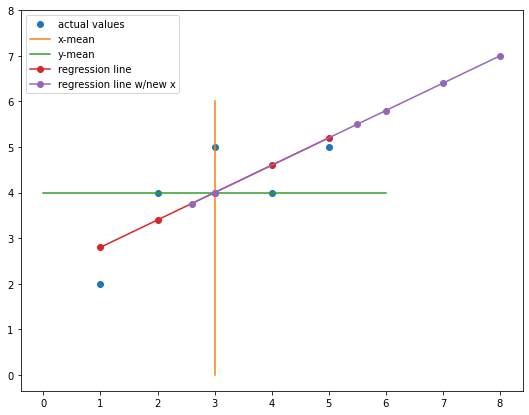

In [ ]:
fig, ax = plt.subplots(figsize=(9,7))
plt.plot(x, y, marker='o', linestyle='none')
plt.plot([3,3], [0, 6]) # a line representing our x mean
plt.plot([0, 6], [4, 4]) # a line representing our y mean
# regression line with points generated from actual x values
plt.plot(generate_regression_points(x, y)[0], generate_regression_points(x, y)[1], marker='o')
# regression line with points generated from new x values
plt.plot(generate_regression_points(x, y, new_x)[2], generate_regression_points(x, y, new_x)[3], marker='o')
ax.set_xticks(range(9))
ax.set_yticks(range(9))
ax.set_xticklabels(range(9))
ax.set_yticklabels(range(9))
plt.legend(['actual values', 'x-mean', 'y-mean', 'regression line', 'regression line w/new x'])
plt.show()

## Step 3: Measure Fit
We'll explore two ways to measure the fit of our regression line to the actual data.

#### The $R^2$ Method
 
We'll first measure the fit by calculating $R^2$ using regression analysis.
 
$R^2$ is, specifically, a comparison of each actual data point's distance to the y-mean to the distance of estimated points along our regression line to the y-mean.
 
Represented mathematically, the equation is:
$$R^2 = \frac{\sum{(\hat{y} - \bar{y})^2}}{\sum{(y - \bar{y})^2}}$$

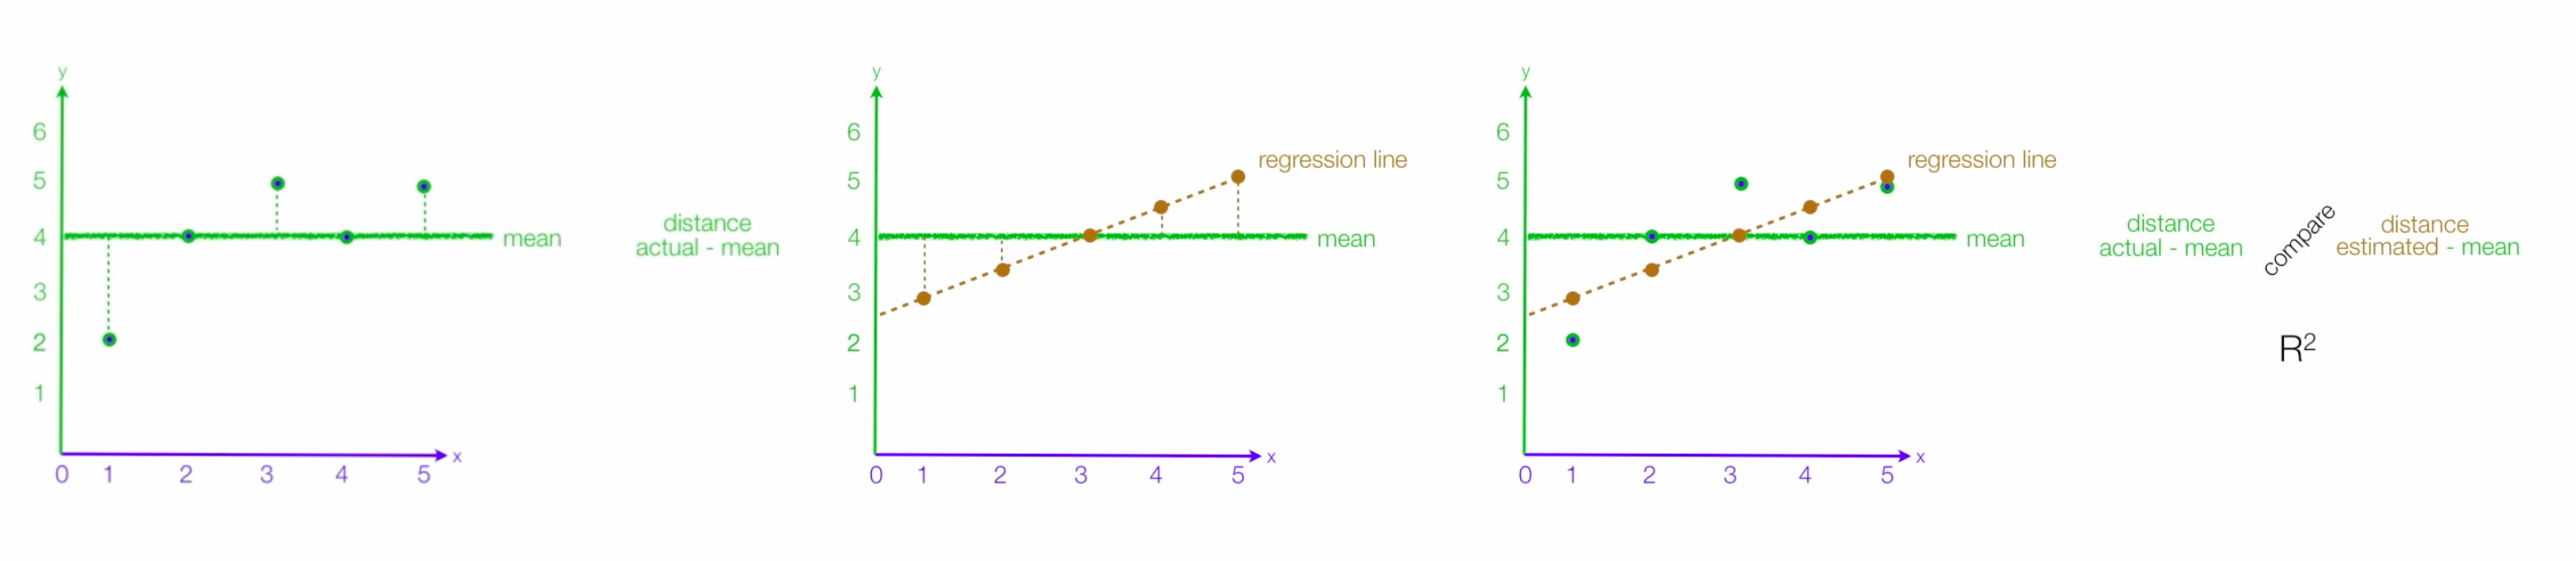

First, lets recall the y-distance $(y - \bar{y})$ and square it $(y - \bar{y})^2$

In [ ]:
y_distance_squared = [y ** 2 for y in y_distance]
y_distance_squared

[4, 0, 1, 0, 1]

In [ ]:
df['(y - ȳ)^2'] = y_distance_squared
df

,x,y,x_distance (x - x̄),y_distance (y - ȳ),(y - ȳ)^2
0,1,2,-2,-2,4
1,2,4,-1,0,0
2,3,5,0,1,1
3,4,4,1,0,0
4,5,5,2,1,1


We can derive our estimated y-values ($\hat{y}$) using our actual x values as we did above with the generate_regression_points function. Again, we use the actual x values for this to generate the closest points on our regression line to the actual values.

In [ ]:
y_hat = generate_regression_points(x, y)[1]

y_hat

[2.8000000000000003, 3.4000000000000004, 4.0, 4.6, 5.2]

In [ ]:
df['ŷ'] = y_hat
df

,x,y,x_distance (x - x̄),y_distance (y - ȳ),(y - ȳ)^2,ŷ
0,1,2,-2,-2,4,2.8
1,2,4,-1,0,0,3.4
2,3,5,0,1,1,4.0
3,4,4,1,0,0,4.6
4,5,5,2,1,1,5.2


Next we need to find the distance from each $\hat{y}$ value to the mean $(\hat{y} - \bar{y})$ and then square those results $(\hat{y} - \bar{y})^2$

In [ ]:
y_hat_distance = [y - y_mean for y in y_hat]
y_hat_distance

[-1.1999999999999997,
 -0.5999999999999996,
 0.0,
 0.5999999999999996,
 1.2000000000000002]

In [ ]:
y_hat_distance_squared = [y ** 2 for y in y_hat_distance]
y_hat_distance_squared

[1.4399999999999993,
 0.3599999999999996,
 0.0,
 0.3599999999999996,
 1.4400000000000004]

In [ ]:
df['(ŷ - ȳ)'] = y_hat_distance
df['(ŷ - ȳ)^2'] = y_hat_distance_squared
df

,x,y,x_distance (x - x̄),y_distance (y - ȳ),(y - ȳ)^2,ŷ,(ŷ - ȳ),(ŷ - ȳ)^2
0,1,2,-2,-2,4,2.8,-1.2,1.44
1,2,4,-1,0,0,3.4,-0.6,0.36
2,3,5,0,1,1,4.0,0.0,0.00
3,4,4,1,0,0,4.6,0.6,0.36
4,5,5,2,1,1,5.2,1.2,1.44


Finally, we can sum y_hat_distance_squared $(\hat{y} - \bar{y})^2$ and devide it by the summed y_distance_squared $(y - \bar{y})^2$ to get $R^2$.

In [ ]:
r_squared = np.sum(y_hat_distance_squared)/np.sum(y_distance_squared)

r_squared

0.5999999999999998

Our $R^2$ is equal to .59.
 
Again, the closer $R^2$ is to 1, the better our regression line fits to the data. Narratively, we can say that an $R^2$ = .59 means that "59% of the variation in our y could be explained by our x"
 
We can define a function that works with our past two functions to calculate $R^2$.

In [ ]:
def get_r_squared(actual_x_values, y_values):
  y_mean = np.mean(y_values, dtype=np.int)
  y_distance = [v-y_mean for v in y_values]

  y_hat = generate_regression_points(actual_x_values, y_values)[1]
  y_hat_distance = [(y - y_mean) ** 2 for y in y_hat]

  r_squared = np.sum(y_hat_distance_squared)/np.sum(y_distance_squared)

  return r_squared

x = [1, 2, 3, 4, 5]
y = [2, 4, 5, 4, 5]

get_r_squared(x, y)

0.5999999999999998

### Standard Error of the Estimate (Mean Square Error) Method
Standard Error of the Estimate is when estimated points on the regression line are compared directly to the actual values. Specifically, the distance (errors) between the actual value and the closest estimated value along our regression line are compared.

The smaller the means squared error, the closer you are to finding the line of best fit. Depending on your data, it may be impossible to get a very small value for the mean squared error. 

Represented mathmatically, the equation is written as: $$\sqrt{\frac{\sum{(\hat{y} - y)^2}}{n - 2}}$$

Where "n" is the number of observations

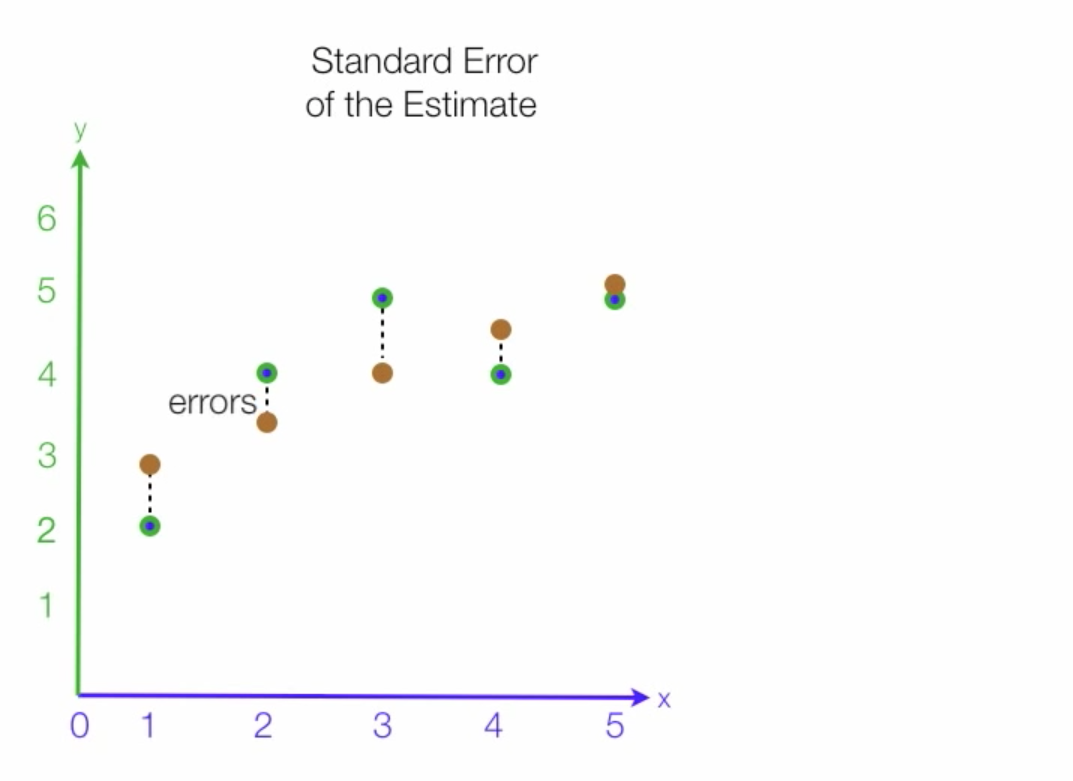

In [ ]:
def get_mean_square_error(actual_x_values, y_values):
  y_hat = generate_regression_points(actual_x_values, y_values)[1]
  # the y-distance between each actual point and the closest estimated value on the regression line
  point_distance_squared = [(y_hat[i] - y_values[i])**2 for i in range(len(y_hat))]
  
  mean_square_error = ((np.sum(point_distance_squared))/(len(y_hat) - 2))**.5
  return mean_square_error

x = [1, 2, 3, 4, 5]
y = [2, 4, 5, 4, 5]

get_mean_square_error(x, y)

0.8944271909999157

Our Standard Error of the Estimate equals .89. This number is not on a 0-1 scale. Depending on the dataset the standard error of the estimate can get quite high. The closer to 0 this number, the better the regression line fits to the data.

### Comparison of $R^2$ and Standard Error of the Estimate

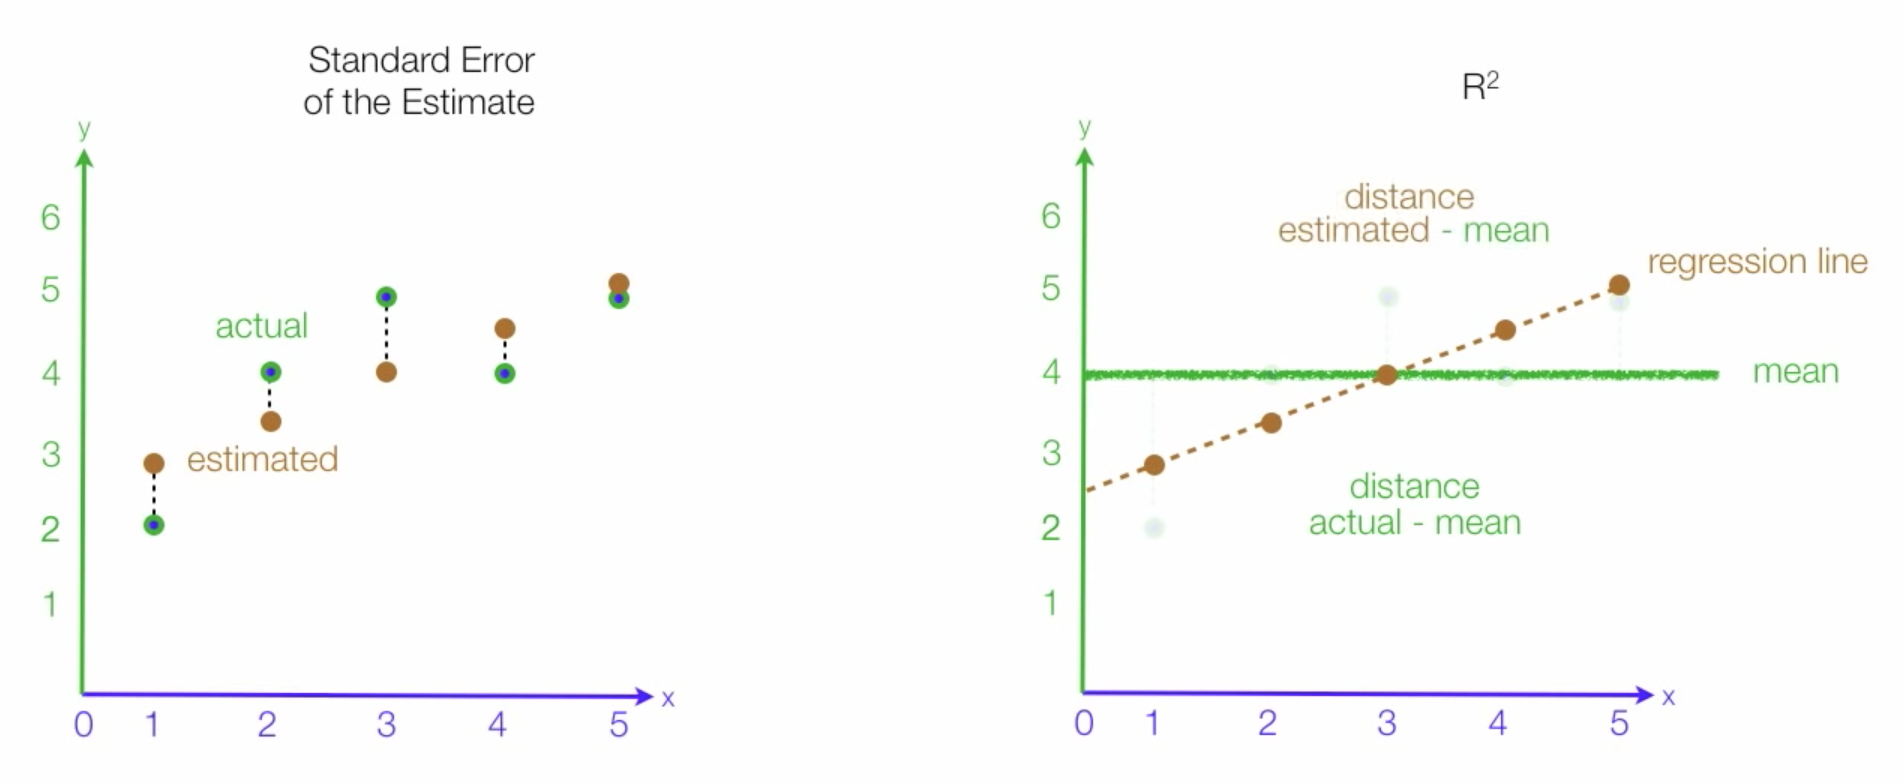

## Conclusion

The method of plotting a regression line demonstrated in this notebook works well for smaller datasets but can be inefficient for larger datasets. Determining the best-fit line of regression for sizable datasets is best left to gradient descent. Gradient descent will also more easily apply to multi-dimensional data. 

I should also note that linear regression will be best suited to features that demonstrate a linear relationship.

$R^2$ is a useful measure of fit for both this method of linear regression and when using gradient descent.